In [11]:
# import libraries
#import gurobipy as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import numpy as np

In [7]:
# import data
links = pd.read_csv("links.csv")
nodes = pd.read_csv("nodes.csv")
loads = pd.read_csv("loads.csv")

In [8]:
# method to get distances
def dist(lat1in, lat2in, lon1in, lon2in):
    # approximate radius of earth in miles
    R = 3958.8

    lat1 = radians(lat1in)
    lon1 = radians(lon1in)
    lat2 = radians(lat2in)
    lon2 = radians(lon2in)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

In [9]:
# rearrange nodes by location
Locs = {
    n : np.array([nodes[lambda x: x['Node']==n]['Latitude'], nodes[lambda x: x['Node']==n]['Longitude']])
    for n in nodes['Node']
}

In [12]:
# package to compute shortest paths
from dijkstar import Graph, find_path

# distance graph
graph = Graph()

# compute distances (length of every link)
for index, row in links.iterrows():
    Node1 = int(row['Node1'])
    Node2 = int(row['Node2'])
    distance = dist(Locs[Node1][0], Locs[Node1][1], Locs[Node2][0], Locs[Node2][1])
    graph.add_edge(Node1, Node2, distance)

In [18]:
#compute harmonic centralities of a Graph
def compute_centralities(g: Graph):
    # initialize
    centralities = {n : 0 for n in nodes['Node']}
    
    for i in nodes['Node']:
        
        for j in nodes['Node']:
            
            try:
                # compute shortest path from i to j
                # Note: distance may be zero, in which case centrality = infinity
                cost = find_path(g, i, j).total_cost
                centralities[i] += 1/cost
            except:
                # no path of finite length could be found, 
                # and hence 0 (= 1/infinity) contribution to the centrality is made
                continue
    return centralities

In [19]:
centralities = compute_centralities(graph)

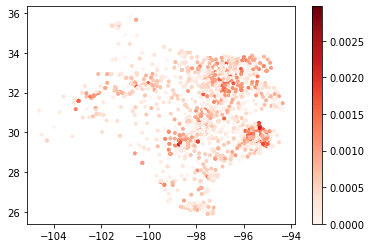

In [21]:
# vectorize the dictionary of centralities
vec_centrality = np.array([centralities[n] for n in nodes['Node']])

# plot heatmap according to centrality
plt.scatter(nodes["Longitude"], nodes["Latitude"], c = vec_centrality, marker = ".", cmap='Reds')
plt.colorbar()
plt.show()

In [26]:
# order the nodes by ascending centrality score
nodes_by_centrality = {node: centrality for node,centrality in sorted(centralities.items(), key=lambda x: x[1])}

In [27]:
nodes_by_centrality

{1003: 0,
 1015: 0,
 1034: 0,
 1036: 0,
 1064: 0,
 2001: 0,
 2011: 0,
 2016: 0,
 2020: 0,
 2026: 0,
 2047: 0,
 2048: 0,
 2052: 0,
 2066: 0,
 2082: 0,
 2091: 0,
 2096: 0,
 2108: 0,
 3022: 0,
 3040: 0,
 3050: 0,
 3076: 0,
 3088: 0,
 3094: 0,
 3096: 0,
 3101: 0,
 3103: 0,
 3107: 0,
 3119: 0,
 3124: 0,
 3127: 0,
 3128: 0,
 3131: 0,
 4004: 0,
 4009: 0,
 4023: 0,
 4024: 0,
 4032: 0,
 4041: 0,
 4067: 0,
 4087: 0,
 4101: 0,
 4104: 0,
 4118: 0,
 4119: 0,
 4121: 0,
 4125: 0,
 4143: 0,
 4154: 0,
 4157: 0,
 4158: 0,
 4167: 0,
 4171: 0,
 4174: 0,
 4179: 0,
 4181: 0,
 5008: 0,
 5009: 0,
 5072: 0,
 5073: 0,
 5076: 0,
 5078: 0,
 5095: 0,
 5101: 0,
 5123: 0,
 5130: 0,
 5151: 0,
 5152: 0,
 5153: 0,
 5158: 0,
 5172: 0,
 5174: 0,
 5200: 0,
 5201: 0,
 5224: 0,
 5228: 0,
 5246: 0,
 5253: 0,
 5266: 0,
 5269: 0,
 5272: 0,
 5278: 0,
 5288: 0,
 5309: 0,
 5315: 0,
 5328: 0,
 5331: 0,
 5338: 0,
 5339: 0,
 5345: 0,
 5352: 0,
 5354: 0,
 5393: 0,
 5394: 0,
 5412: 0,
 5431: 0,
 5433: 0,
 5436: 0,
 5437: 0,
 5438: 0,
